In [165]:
import pandas as pd
import numpy as np
import re 

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [12]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.0 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.0/101.0 MB 10.9 MB/s eta 0:00:10
    --------------------------------------- 1.5/101.0 MB 12.0 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 10.9 MB/s eta 0:00:10
   - -------------------------------------- 2.8/101.0 MB 12.0 MB/s eta 0:00:09
   - -------------------------------------- 3.9/101.0 MB 14.0 MB/s eta 0:00:07
   -- ------------------------------------- 5.3/101.0 MB 16.0 MB/s eta 0:00:06
   -- ---------

In [166]:
from catboost import CatBoostRegressor

In [19]:
pip install missingno

In [3]:
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [167]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

### 결측값 확인

In [15]:
df.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

<Axes: >

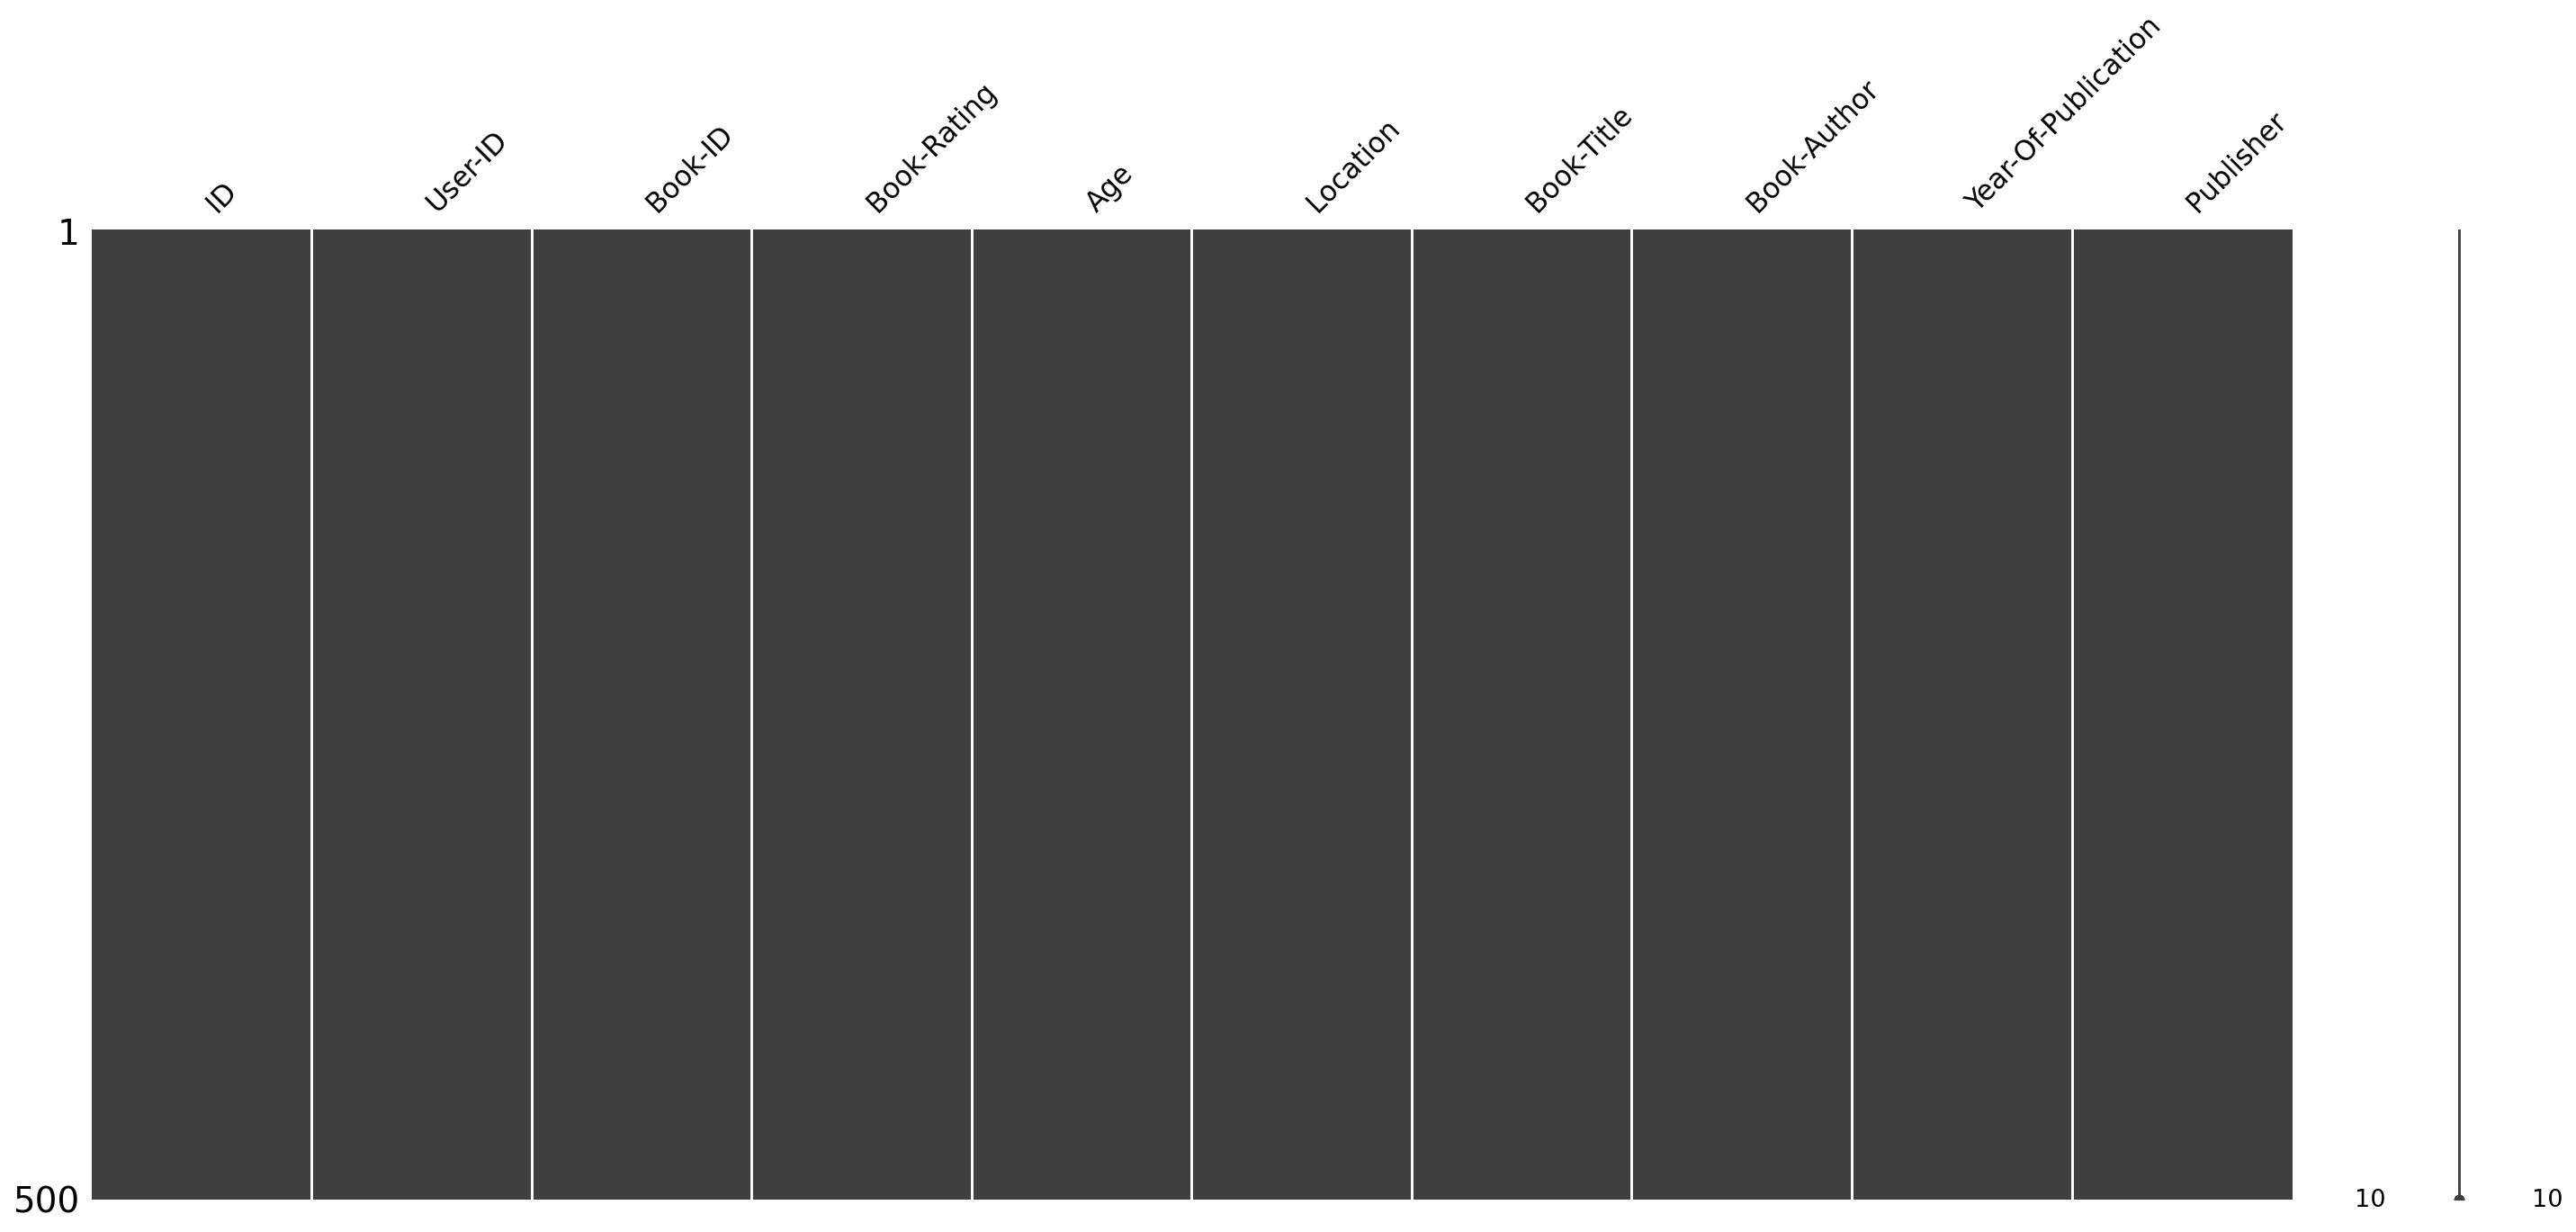

In [21]:
msno.matrix(train_df.sample(500)) 

<Axes: >

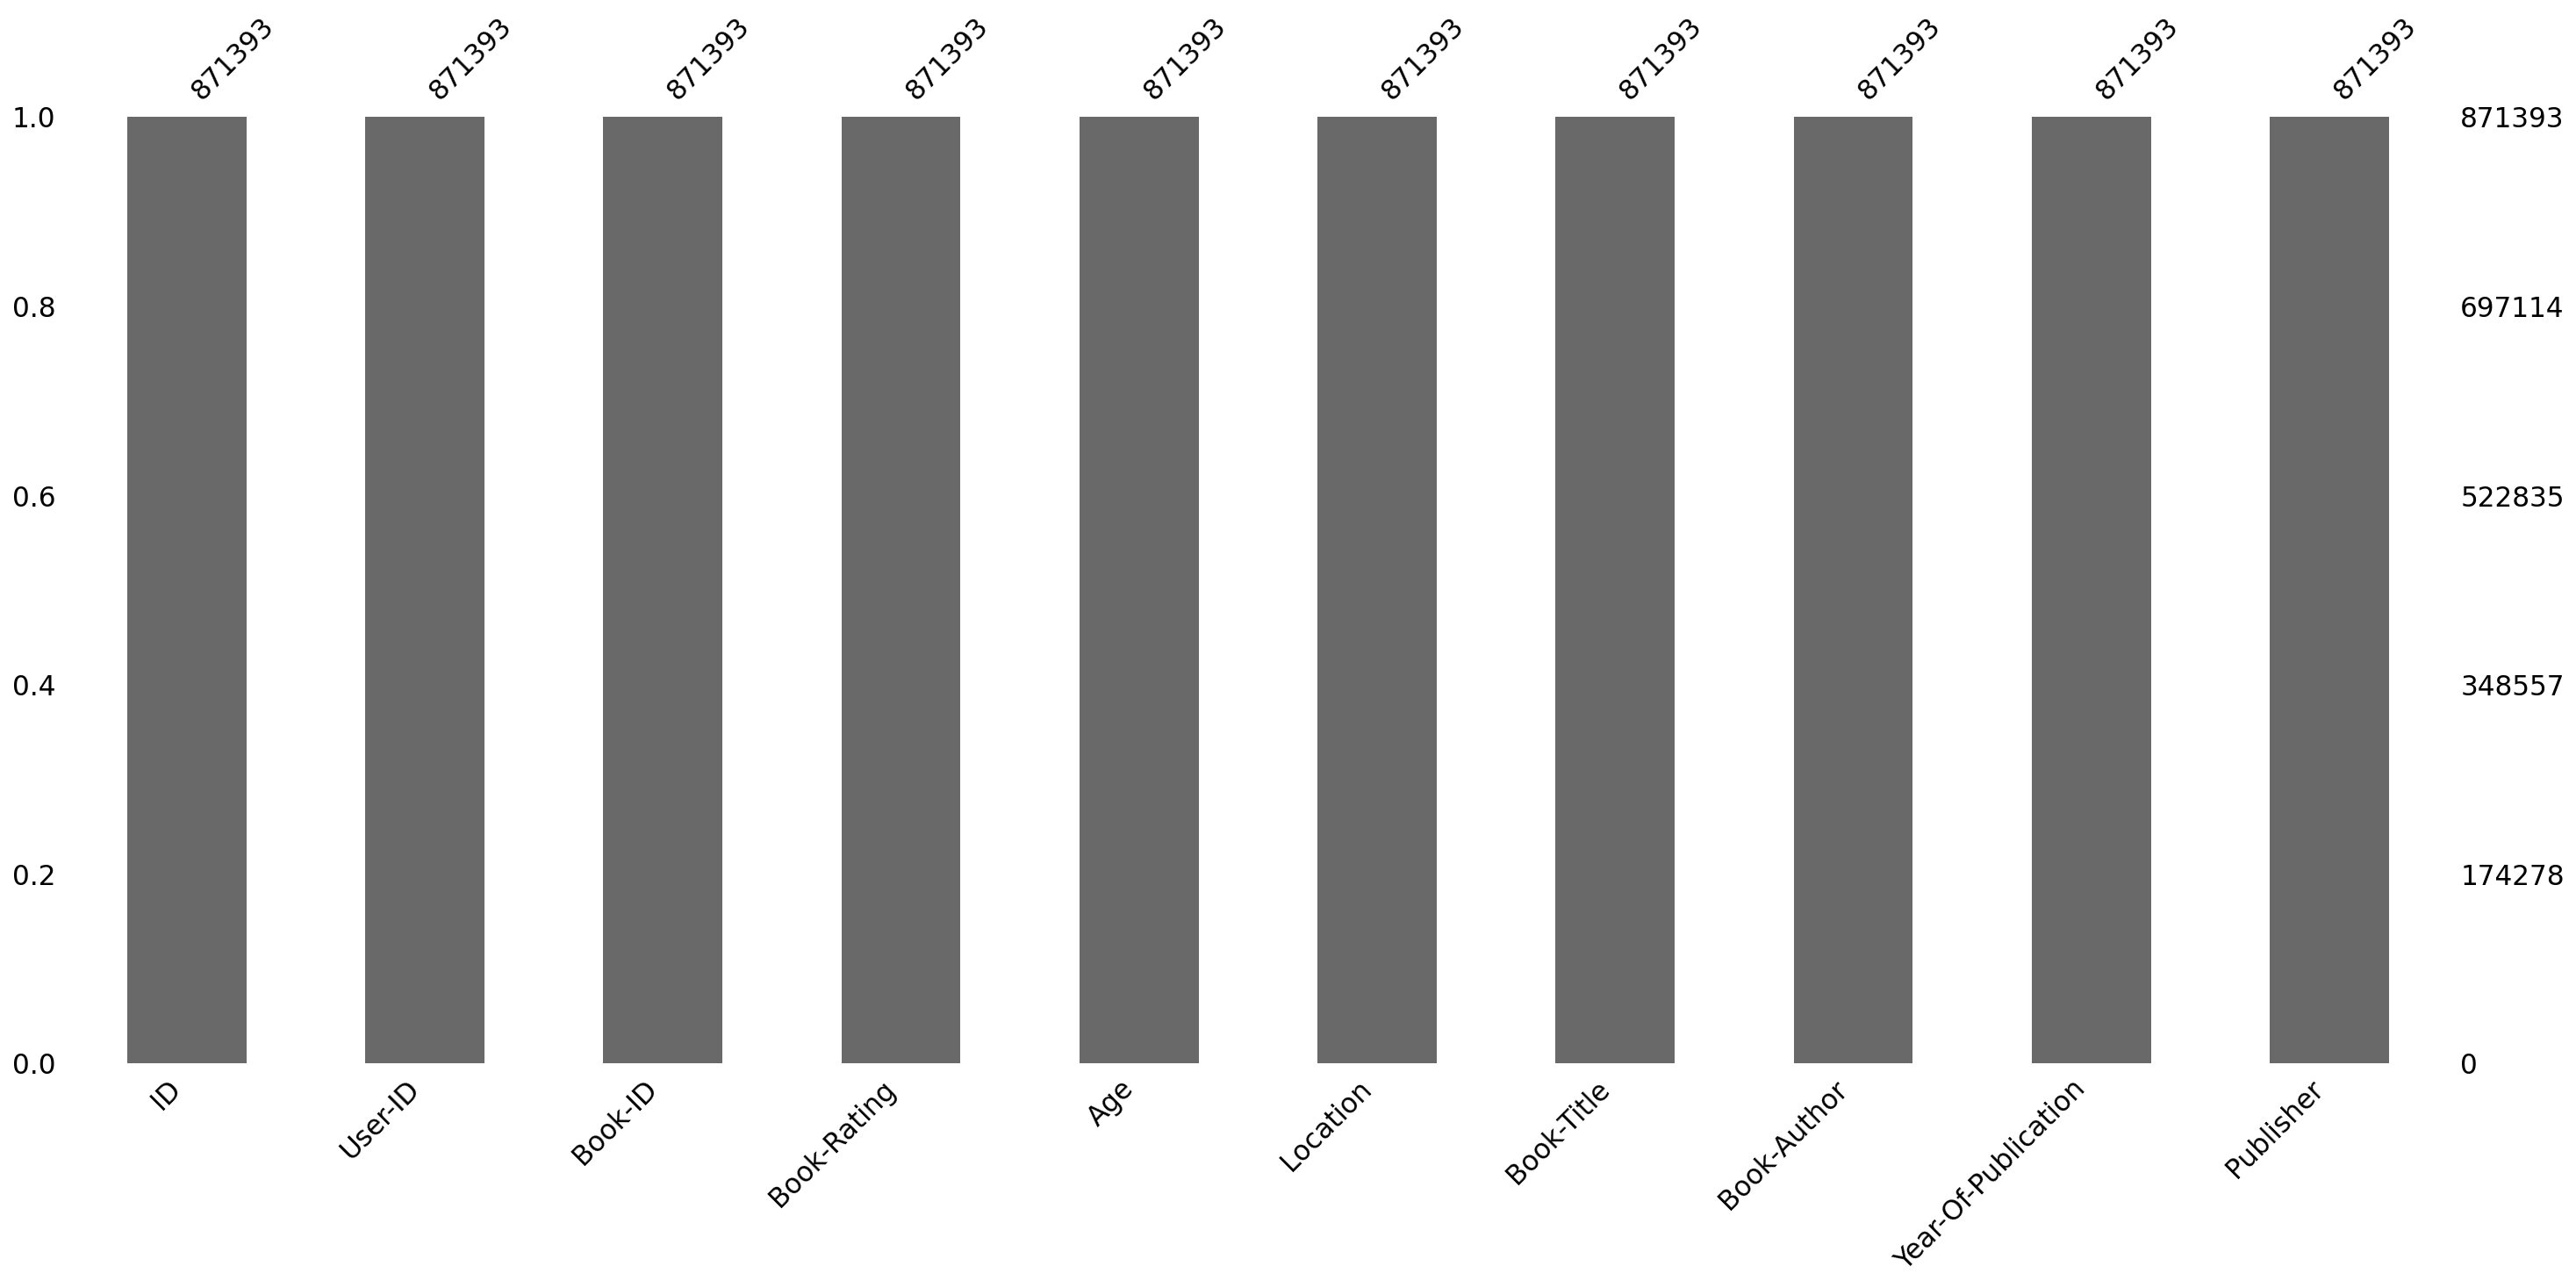

In [22]:
msno.bar(train_df)

## 1. Year-Of-Publication 전처리

In [184]:
# train_df['Year-Of-Publication'].dtype

dtype('float64')

In [185]:
# train_df['Year-Of-Publication'] = pd.to_datetime(train_df['Year-Of-Publication'])

In [186]:
# train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   871393 non-null  object        
 1   User-ID              871393 non-null  object        
 2   Book-ID              871393 non-null  object        
 3   Book-Rating          871393 non-null  int64         
 4   Age                  871393 non-null  float64       
 5   Location             871393 non-null  object        
 6   Book-Title           871393 non-null  object        
 7   Book-Author          871393 non-null  object        
 8   Year-Of-Publication  871393 non-null  datetime64[ns]
 9   Publisher            871393 non-null  object        
 10  Age-Group            871393 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 67.3+ MB


In [190]:
# train_df['Year']= train_df['Year-Of-Publication'].dt.year

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
871388    1970
871389    1970
871390    1970
871391    1970
871392    1970
Name: Year-Of-Publication, Length: 871393, dtype: int64

## 2. Book-Author 전처리

In [56]:
train_df['Book-Author-lower'] = train_df['Book-Author'].apply(lambda x : text_preprocessing(x))

In [49]:
train_df['Book-Author-lower'].value_counts()

stephenking        8590
johngrisham        7927
noraroberts        7072
jamespatterson     5020
daniellesteel      4236
                   ... 
errolselkirk          1
bernalcpayne          1
francisxking          1
jamesrgroff           1
stephengriffith       1
Name: Book-Author-lower, Length: 88051, dtype: int64

In [58]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
train_df['Book-Author-lower'].unique()

array(['ronajaffe', 'williamshakespeare', 'walterscott', 'sueharrison', 'lindalayshuler', 'williamgibson', 'antoinedesaintexupry', 'charlesdelint', 'phillipcmcgraw', 'pauldrmeier', 'bretlott', 'daniellschacter', 'arthurcclarke', 'johngrisham', 'susannefrhlich', 'guidoknopp', 'andrewsolomon', 'katyareimann', 'robincook', 'josteingaarder', 'waltermoers', 'rosetremain', 'ianmcewan', 'louisaermelino', 'sheriholman', 'alancumming', 'timfarrington', 'jenniferegan', 'anthonybourdain', 'anitashreve', 'ritaciresi', 'stefanzweig', 'raelawrence', 'jonathankellerman', 'judithmichael', 'lawrencesanders', 'tessgerritsen', 'judedeveraux', 'frankperetti', 'noraroberts', 'fernmichaels', 'harlancoben', 'jamespatterson', 'fayekellerman', 'stephenking', 'deanrkoontz', 'ericschlosser', 'maryhigginsclark', 'mohayder', 'jakelogan', 'antonioskarmeta', 'zeruyashalev', 'barbarawood', 'utahess', 'robertludlum', 'richardrusso', 'angelabrownemiller', 'petedavies', 'johnedouglas', 'johncramer', 'nicholassparks', 'w

In [62]:
def find_author(author_list:str):
    if author_list in ['joannekrowling','rowlingjk']:
        return 'jkrowling'
    if author_list in ['shakespeare', 'normanshakespeare','edfredsontbowersshakespeare']:
        return 'williamshakespeare'
    if author_list in ['guillermoshakespeare']:
        return 'victorhugo'
    return author_list

In [63]:
train_df['Book-Author']=train_df['Book-Author'].apply(lambda x : find_author(x))

## 3. Location 전처리

In [5]:
train_df['Location'].value_counts()

toronto, ontario, canada                 12267
n/a, n/a, n/a                            11161
chicago, illinois, usa                    7214
seattle, washington, usa                  6967
ottawa, ontario, canada                   6915
                                         ...  
qom, n/a, iran                               1
warlingham, england, united kingdom          1
pfäffikon, nebraska, switzerland             1
puerto vallarta, mexico, usa                 1
castiglion fiorentino, toscana, italy        1
Name: Location, Length: 20971, dtype: int64

In [196]:
train_df.Location.str.count(',')

0         2
1         2
2         2
3         2
4         2
         ..
871388    2
871389    2
871390    2
871391    2
871392    2
Name: Location, Length: 871393, dtype: int64

In [197]:
def select_string_based_on_spaces(text):
    # 단어 사이의 공백 수 세기
    space_count = text.count(',')

    # 조건에 따라 문자열 선택
    if space_count == 3:
        selected_text = text.split(',')[3].strip()
    elif space_count == 2:
        selected_text = text.split(',')[2].strip()
    else:
        selected_text = "Invalid space count"

    return selected_text

result_1 = train_df['Location'].apply(select_string_based_on_spaces)
print(result_1)

0         canada
1         canada
2         canada
3         canada
4         canada
           ...  
871388       usa
871389       usa
871390    canada
871391       usa
871392     italy
Name: Location, Length: 871393, dtype: object


In [22]:
result_1.unique()

array(['canada', 'usa', 'germany', 'spain', 'australia', 'united kingdom',
       '', 'italy', 'netherlands', 'portugal', 'sweden', 'austria',
       'france', 'finland', 'new zealand', 'singapore', 'switzerland',
       'philippines', 'españa', 'malaysia', 'belgium', 'japan', 'denmark',
       'belize', 'england', 'poland', 'ireland', 'haiti',
       'trinidad and tobago', 'deutschland', 'tanzania', 'moldova',
       'bulgaria', 'luxembourg', 'south africa', 'czech republic',
       'israel', 'malta', 'petrolwar nation', 'kuwait', 'peru', 'ecuador',
       'south korea', 'turkey', 'nigeria', 'brazil', 'hungary',
       'indonesia', 'kazakhstan', 'india', 'china', 'egypt', 'croatia',
       'taiwan', 'argentina', 'chile', 'venezuela', 'galiza', 'iceland',
       'scotland', 'bolivia', 'lithuania', 'norway', 'mexico', 'bahamas',
       'united sates', 'romania', 'iran', 'dominican republic',
       'maricopa', 'the world tomorrow', 'andorra', 'galiza neghra',
       'jersey', 'ghana', '

In [198]:
train_df['try']=result_1

In [29]:
train_df.columns

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'try'],
      dtype='object')

In [30]:
train_df['try'].dtype

dtype('O')

#### 전처리 함수1

In [199]:
import re
def text_preprocessing(summary):
    summary = re.sub("[.,\'\"''""!?' ']", "", summary)
    summary = re.sub("[^0-9a-zA-Z\\s]", "", summary)
    summary = summary.lower()
    return summary

In [200]:
train_df['try'] = train_df['try'].apply(lambda x : text_preprocessing(x))

#### 전처리 함수2

In [201]:
def find_country(country_list:str):
    if country_list in ['galiza']:
        return 'spain'
    elif country_list in ['united sates','maricopa','richmond country','framingham','usa (currently living in england)','saint loius','shelby',
                     'los estados unidos de norte america','united states','polk','u.s.a.','morgan','us','ventura county','hernando','kern',
                     'onondaga nation','disgruntled states of america','san mateo','united state','aroostook','guam','fort bend',
                      'hungary and usa','u.s. of a.','united staes','america','alachua','u.s>']:
        return 'usa'
    elif country_list in ['the world tomorrow', 'galiza neghra','universe','Invalid space count','n/a','tdzimi','space','here and there',
                     'cherokee','csa','x','we`re global!','unknown','nz','ysa','n/a - on the road','the great white north','far away...',
                      'quit','k1c7b1','caribbean sea','st.thomasi','rutherford','"n/a"','the','st. helena','c',
                      'everywhere and anywhere']:
        return 'other'
    elif country_list in ['jersey','la france']:
        return ' france' 
    elif country_list in ['catalunya','lleida','catalonia','berguedà','catalunya spain','madrid','orense']:
        return ' spain'
    elif country_list in [' la chine éternelle !',' macau']:
        return ' china'
    elif country_list in ['alderney','worcester','guernsey','prince william','bermuda','cayman islands','channel islands','u.k.',
                     'camden']:
        return 'united kingdom'
    elif country_list in ['collin']:
        return 'czech republic'
    elif country_list in ['burma']:
        return 'myanmar'
    elif country_list in ['united arab emirates']:
        return 'u.a.e'
    elif country_list in ['pender']:
        return 'poland'
    elif country_list in ['tobago']:
        return 'trinidad and tobago'  
    elif country_list in ['urugua']:
        return 'uruguay'
    elif country_list in ['ferrara','italia','l`italia']:
        return 'italy'
    elif country_list in ['niger']:
        return 'nigeria'
    elif country_list in ['la belgique']:
        return 'belgium'
    elif country_list in ['burlington','cananda']:
        return 'canada'
    return country_list   


In [202]:
train_df['try'] = train_df['try'].apply(lambda x : find_country(x))

In [203]:
train_df['try'].value_counts()

usa                   630123
canada                 78564
unitedkingdom          27050
germany                23471
                       21012
                       ...  
palau                      1
galizaneghra               1
theworldtomorrow           1
thegreatwhitenorth         1
zambia                     1
Name: try, Length: 200, dtype: int64

#### 컬럼 이름 Country로 변환

In [204]:
train_df = train_df.rename(columns={'try':'Country'})

In [205]:
train_df.columns

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Age-Group', 'Country'],
      dtype='object')

#### Country 정보가 없는 사람 리스트 생성

In [46]:
train_no_country = train_df[train_df['Country']=='other'][['ID','Book-ID']]

In [210]:
train_no_country.head()

,ID,Book-ID
70367,TRAIN_070367,BOOK_001259
70368,TRAIN_070368,BOOK_001928
70369,TRAIN_070369,BOOK_015521
70370,TRAIN_070370,BOOK_017517
70371,TRAIN_070371,BOOK_021411


#### Country가 명확하지 않은 유저 채우기

In [211]:
book_country_info = train_df.groupby(['Book-ID','Country'])['Country'].count().groupby('Book-ID').idxmax().reset_index()
book_country_info

,Book-ID,Country
0,BOOK_000001,"(BOOK_000001, unitedkingdom)"
1,BOOK_000002,"(BOOK_000002, usa)"
2,BOOK_000003,"(BOOK_000003, australia)"
3,BOOK_000004,"(BOOK_000004, usa)"
4,BOOK_000005,"(BOOK_000005, usa)"
...,...,...
243436,BOOK_270051,"(BOOK_270051, usa)"
243437,BOOK_270052,"(BOOK_270052, unitedkingdom)"
243438,BOOK_270053,"(BOOK_270053, usa)"
243439,BOOK_270054,"(BOOK_270054, usa)"


## 4. Book-Rating 전처리

#### Book-Rating 범주형으로 변환

In [145]:
train_df['Book-Rating'].value_counts()

0     548804
8      76971
10     60024
7      55852
9      50494
5      38416
6      26670
4       6462
3       4374
2       2019
1       1307
Name: Book-Rating, dtype: int64

In [55]:
train_df['Book-Rating']=train_df['Book-Rating'].astype('category')

In [56]:
train_df['Book-Rating'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

In [57]:
train_df['Book-Rating'].cat.set_categories([0,1,2,3,4,5,6,7,8,9,10],ordered=True)

0         8
1         8
2         0
3         0
4         8
         ..
871388    0
871389    0
871390    0
871391    8
871392    0
Name: Book-Rating, Length: 871393, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

## 5. Age 전처리 

#### Age 범주형으로 변환

In [172]:
bins=[-1,5,12,18,29,49,64,float('inf')]
labels=['영‧유아(0~5세)','아동(6~12세)','청소년(13~18세)','청년(19~29세)','중년(30~49세)',
      '장년(50~64세)','노년(65세 이상)']
train_df['Age-Group']=pd.cut(train_df['Age'],bins=bins,labels=labels)

In [173]:
train_df['Age-Group'].value_counts()

중년(30~49세)     572843
청년(19~29세)     162946
장년(50~64세)      95909
청소년(13~18세)     20939
노년(65세 이상)      14096
아동(6~12세)        3047
영‧유아(0~5세)       1613
Name: Age-Group, dtype: int64

#### IQR기법으로 Age 이상치 제거

In [174]:
def outlier_iqr(data, column):
    global lower, upper
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    print('iqr은', iqr, '이다.')
    print('lower은', lower, '이다.')
    print('upper은', upper, '이다.')
    
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    print('총 이상값 개수는', data1.shape[0] + data2.shape[0], '이다.')
    return pd.concat([data1, data2])
    
outlier_iqr(train_df, 'Age')

iqr은 10.0 이다.
lower은 16.0 이다.
upper은 56.0 이다.
총 이상값 개수는 61776 이다.


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age-Group
143,TRAIN_000143,USER_00025,BOOK_200309,8,58.0,"severna park, maryland, usa",Houses of Stone,Barbara Michaels,1993.0,Simon &amp; Schuster,장년(50~64세)
145,TRAIN_000145,USER_00027,BOOK_212987,7,68.0,"kirkland, washington, usa",The Stone Carvers,Jane Urquhart,2002.0,Viking Books,노년(65세 이상)
314,TRAIN_000314,USER_00071,BOOK_184599,7,69.0,"thunder bay, ontario, canada",The Long Road Home,Danielle Steel,1999.0,Dell Publishing Company,노년(65세 이상)
401,TRAIN_000401,USER_00087,BOOK_076132,8,61.0,"anchorage, alaska, usa",The King of the Fields,Isaac Bashevis Singer,1989.0,Penguin USA,장년(50~64세)
482,TRAIN_000482,USER_00110,BOOK_098600,8,66.0,"marietta, georgia, usa",Floaters,Joseph Wambaugh,1996.0,Bantam,노년(65세 이상)
...,...,...,...,...,...,...,...,...,...,...,...
870913,TRAIN_870913,USER_92086,BOOK_221348,0,0.0,"mountain view, california, usa",The Quotable Climber,Jonathan Waterman,2002.0,Lyons Press,영‧유아(0~5세)
870914,TRAIN_870914,USER_92086,BOOK_222040,0,0.0,"mountain view, california, usa",A Kind of Grace: A Treasury of Sportswriting b...,Ron Rapoport,1994.0,Zenobia Press,영‧유아(0~5세)
870915,TRAIN_870915,USER_92086,BOOK_230499,0,0.0,"mountain view, california, usa",Triathlon Swimming Made Easy: How Anyone Can S...,Terry Laughlin,2002.0,Total Immersion Inc.,영‧유아(0~5세)
870916,TRAIN_870916,USER_92086,BOOK_231726,9,0.0,"mountain view, california, usa",A Passion for Golf: The Best of Golf Writing,Bishop Schuyler,1999.0,St Martins Pr,영‧유아(0~5세)


C:\Users\lgh63\AppData\Local\Temp\ipykernel_33676\1644573700.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Age, bins=50, kde=False)


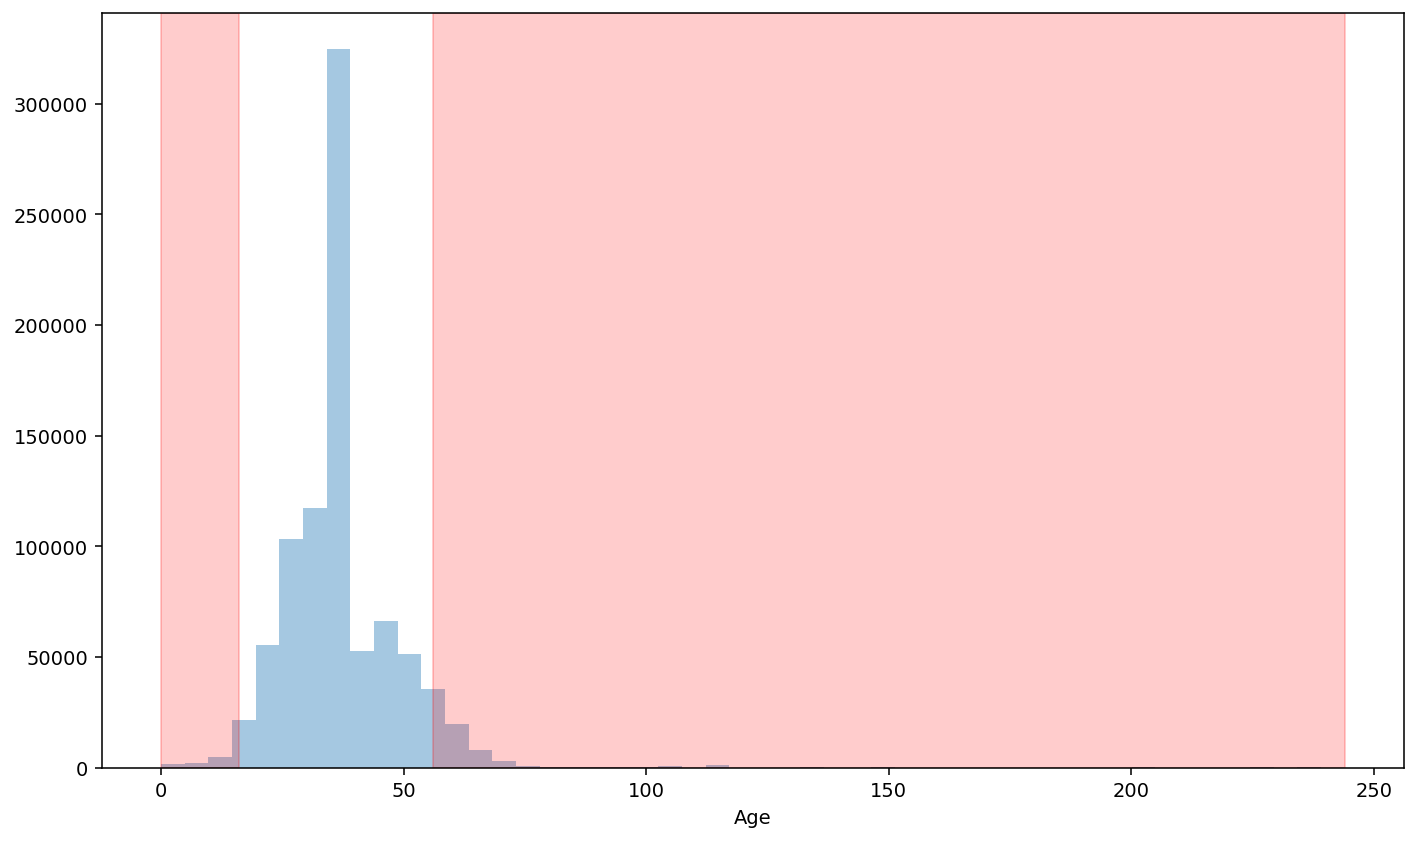

In [175]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.distplot(train_df.Age, bins=50, kde=False)
plt.axvspan(xmin=lower, xmax=train_df.Age.min(), alpha=0.2,color='red')
plt.axvspan(xmin=upper, xmax=train_df.Age.max(), alpha = 0.2, color='red')
plt.show();

In [176]:
no_outlier = train_df[(train_df['Age'] < upper) | (train_df['Age'] > lower)]
len(no_outlier)

871393

In [177]:
outlier = train_df[(train_df['Age']> upper) | (train_df['Age']<lower)]
len(outlier)

61776

In [178]:
outlier_index = [outlier.index]
outlier_index

[Int64Index([   143,    145,    176,    314,    401,    475,    482,    483,
                522,    526,
             ...
             870908, 870909, 870910, 870911, 870912, 870913, 870914, 870915,
             870916, 870917],
            dtype='int64', length=61776)]

In [179]:
train_df.iloc[outlier_index,4]=int(train_df['Age'].mean())

In [180]:
# outlier 값을 평균값으로 변환한 것 확인
train_df.iloc[143,4]

36.0